In [54]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)





Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [3]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 702 images belonging to 6 classes.
Found 173 images belonging to 6 classes.


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
22/22 [==============================] - 669s 30s/step - loss: 1.2374 - acc: 0.5624 - val_loss: 0.6581 - val_acc: 0.7572
Epoch 2/5
22/22 [==============================] - 672s 31s/step - loss: 0.4060 - acc: 0.8705 - val_loss: 0.5036 - val_acc: 0.8150
Epoch 3/5
22/22 [==============================] - 667s 30s/step - loss: 0.2716 - acc: 0.9062 - val_loss: 0.3945 - val_acc: 0.8786
Epoch 4/5
22/22 [==============================] - 676s 31s/step - loss: 0.1873 - acc: 0.9544 - val_loss: 0.4107 - val_acc: 0.8671
Epoch 5/5
22/22 [==============================] - 667s 30s/step - loss: 0.1465 - acc: 0.9642 - val_loss: 0.3932 - val_acc: 0.8613


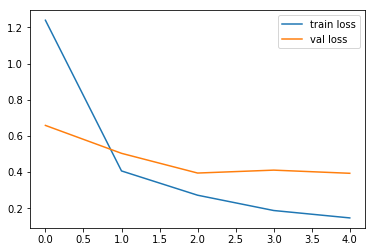

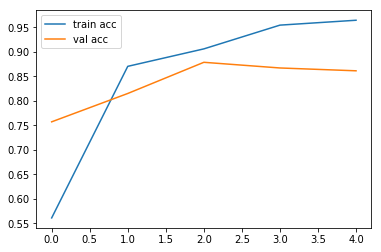

<Figure size 432x288 with 0 Axes>

In [4]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [1]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np



models = load_model('facefeatures_new_model.h5')
models.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [2]:
img = image.load_img(r"C:\Users\Mayank\Desktop\Working_Digi\IMG_20190521_192015_1_.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = models.predict(images, batch_size=1)
print (classes)

[[0.0000000e+00 1.7988939e-18 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00]]


In [3]:
classes.shape

(1, 6)

In [7]:
index_max = np.argmax(classes)
index_max

5